In [1]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

_ = sns.set(style="darkgrid", palette="colorblind")

In [2]:
def get_last_avg_return(entity, project, experiments, window=500, frequency=20000):
    api = wandb.Api()
    runs = api.runs(entity + "/" + project)
    dfs = []
    for run in runs:
        _, experiment, seed, _ = run.name.split("__")
        if experiment in experiments:
            history = run.scan_history(keys=["train/episodic_return", "test/episodic_return", "global_step"])
            df_ = pd.DataFrame(history)
            df_train = df_[["train/episodic_return", "global_step"]]
            df_test = df_[["test/episodic_return", "global_step"]]
            df_train["Avg. Episodic Return"] = df_train["train/episodic_return"].rolling(window, min_periods=1, center=True, closed="both").mean()
            df_train = df_train.drop(["train/episodic_return"], axis=1)
            df_test["Avg. Episodic Return"] = df_test["test/episodic_return"].rolling(window, min_periods=1, center=True, closed="both").mean()
            df_test = df_test.drop(["test/episodic_return"], axis=1)
            decimated = np.arange(0, 24990000 + 1, frequency).reshape(-1, 1)
            d = cdist(df_train["global_step"].to_numpy().reshape(-1, 1), decimated)
            idx = np.argmin(d, 0)
            df_train = df_train.loc[idx]
            df_test = df_test.loc[idx]
            df_train["Experiment"] = experiment
            df_test["Experiment"] = experiment
            df_train["Seed"] = seed
            df_test["Seed"] = seed
            df_train["Task"] = "Train"
            df_test["Task"] = "Test"
            df_train["Global Step"] = frequency * round(df_train["global_step"] / frequency)
            df_test["Global Step"] = frequency * round(df_test["global_step"] / frequency)
            dfs.append(df_train)
            dfs.append(df_test)
    return pd.concat(dfs, ignore_index=True)

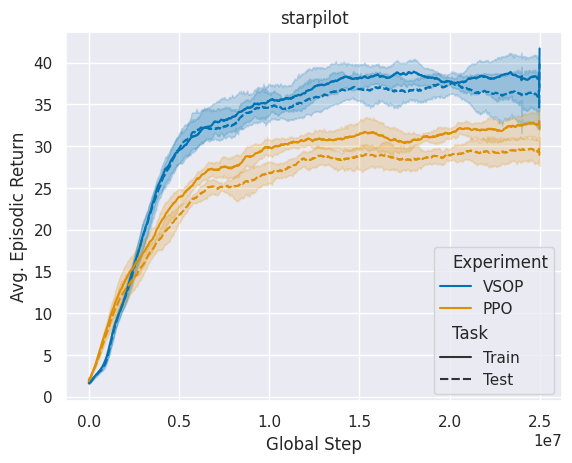

In [47]:
entity = "a-jesson"
project = "starpilot"
mapping = {
    "ppo-3ow": "PPO",
    "vsop-8c2": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=20000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

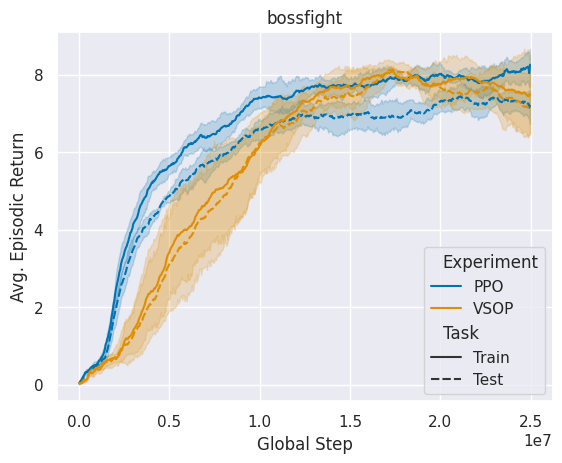

In [16]:
entity = "a-jesson"
project = "bossfight"
mapping = {
    "ppo-6p1": "PPO",
    "vsop-n8n": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

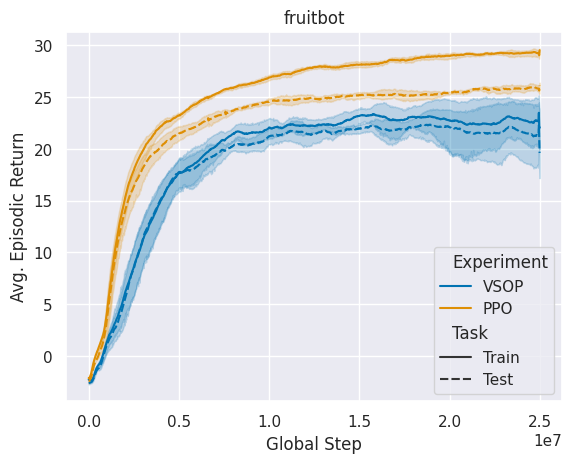

In [3]:
entity = "a-jesson"
project = "fruitbot"
mapping = {
    "ppo-8z4": "PPO",
    "vsop-276": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=20000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

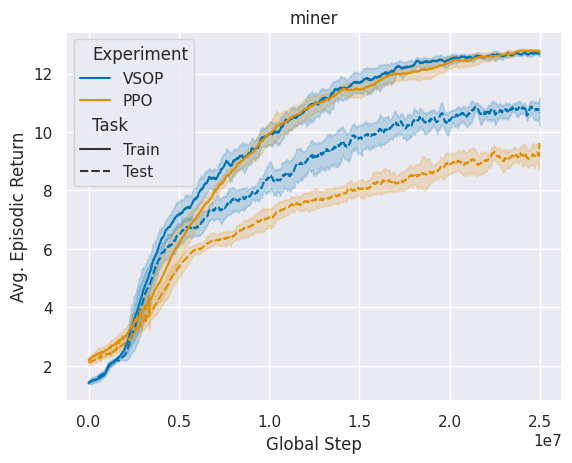

In [4]:
entity = "a-jesson"
project = "miner"
mapping = {
    "ppo-4lu": "PPO",
    "vsop-8pi": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=20000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

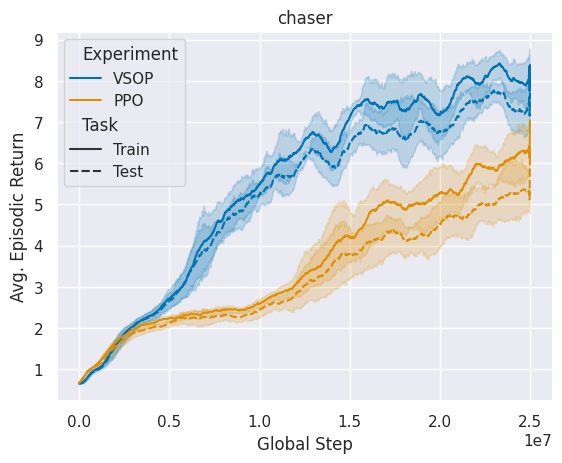

In [5]:
entity = "a-jesson"
project = "chaser"
mapping = {
    "ppo-am4": "PPO",
    "vsop-8pa": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=20000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

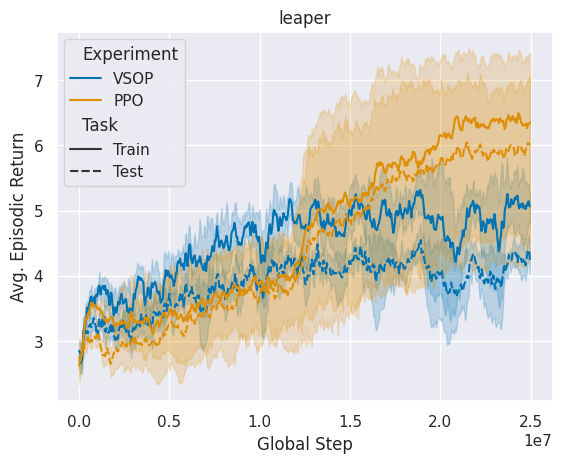

In [3]:
entity = "a-jesson"
project = "leaper"
mapping = {
    "ppo-3m1": "PPO",
    "vsop-2at": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

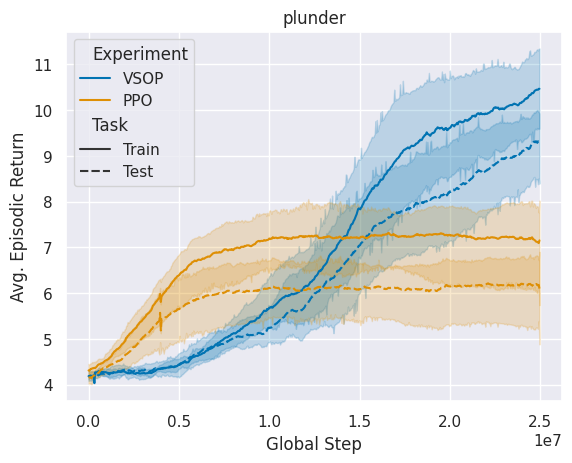

In [4]:
entity = "a-jesson"
project = "plunder"
mapping = {
    "ppo-5iy": "PPO",
    "vsop-41y": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

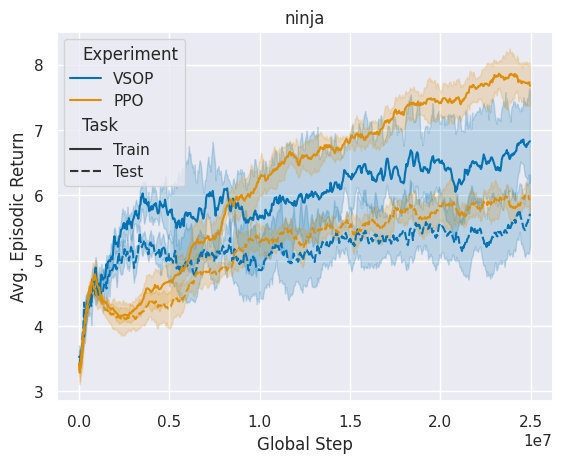

In [5]:
entity = "a-jesson"
project = "ninja"
mapping = {
    "ppo-8kn": "PPO",
    "vsop-7td": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

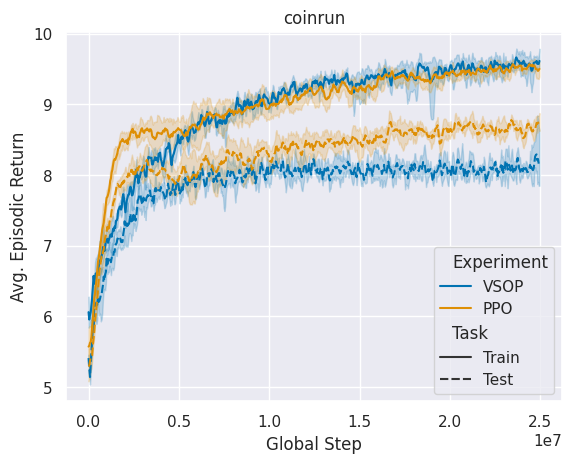

In [6]:
entity = "a-jesson"
project = "coinrun"
mapping = {
    "ppo-8th": "PPO",
    "vsop-9ra": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

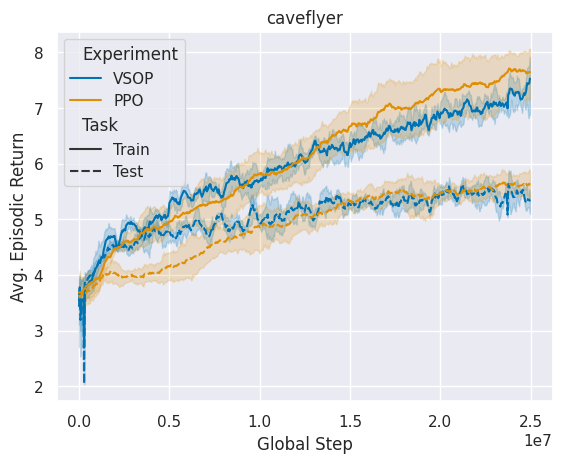

In [7]:
entity = "a-jesson"
project = "caveflyer"
mapping = {
    "ppo-2gx": "PPO",
    "vsop-9aq": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


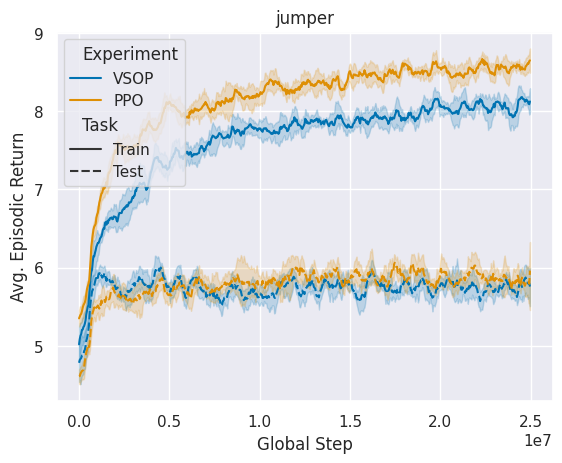

In [8]:
entity = "a-jesson"
project = "jumper"
mapping = {
    "ppo-3qv": "PPO",
    "vsop-5f6": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

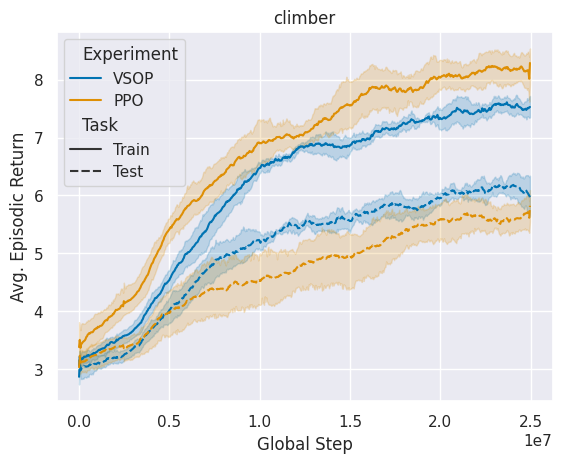

In [9]:
entity = "a-jesson"
project = "climber"
mapping = {
    "ppo-1xr": "PPO",
    "vsop-60b": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

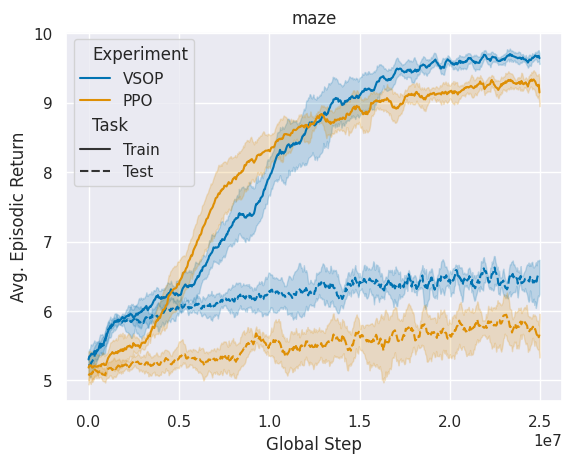

In [10]:
entity = "a-jesson"
project = "maze"
mapping = {
    "ppo-yae": "PPO",
    "vsop-4ow": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


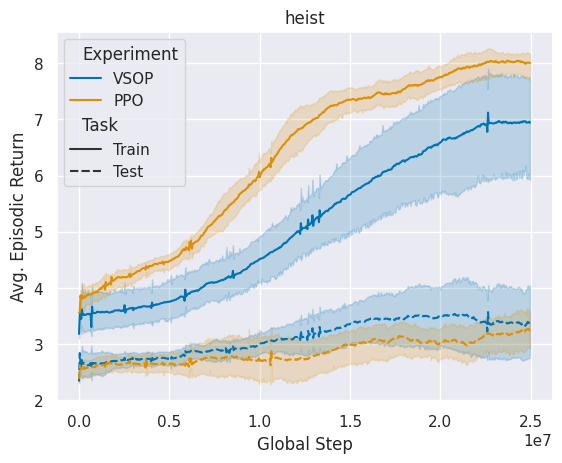

In [11]:
entity = "a-jesson"
project = "heist"
mapping = {
    "ppo-4tk": "PPO",
    "vsop-926": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


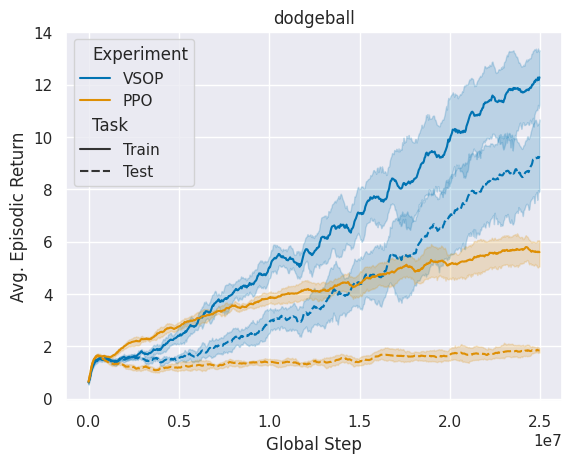

In [12]:
entity = "a-jesson"
project = "dodgeball"
mapping = {
    "ppo-3jr": "PPO",
    "vsop-82s": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


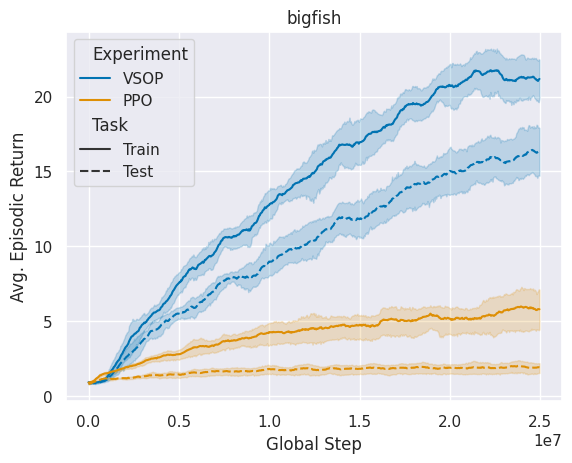

In [13]:
entity = "a-jesson"
project = "bigfish"
mapping = {
    "ppo-5ew": "PPO",
    "vsop-9q7": "VSOP",
}
experiments = list(mapping.keys())
experiments.sort()
df = get_last_avg_return(
    entity, 
    project, 
    experiments,
    window=1000,
    frequency=40000,
)
for k, v in mapping.items():
    df.loc[df["Experiment"] == k, "Experiment"] = v
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    # palette=["C1", "C1", "C0", "C0", "C2", "C2", "C3", "C3",],
    style="Task",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")